<a href="https://colab.research.google.com/github/AminaShabbir26/AminaShabbir26/blob/main/Bank_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Bank Customer Churn Prediction.csv to Bank Customer Churn Prediction (1).csv
   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  


<Figure size 1000x800 with 0 Axes>

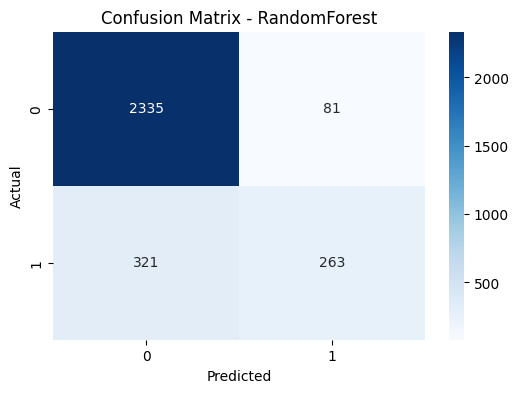

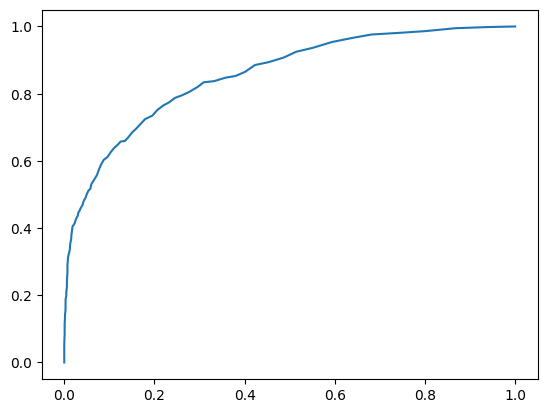

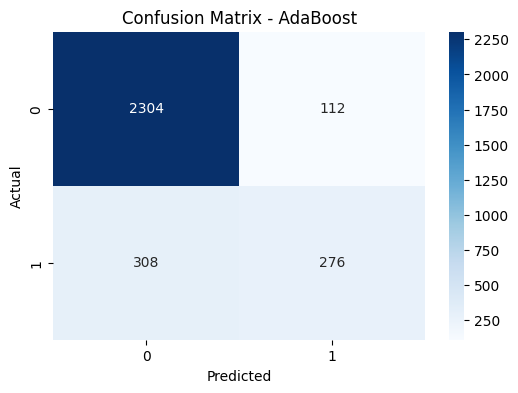

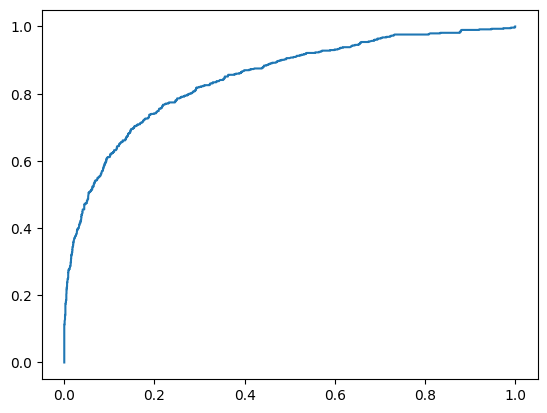

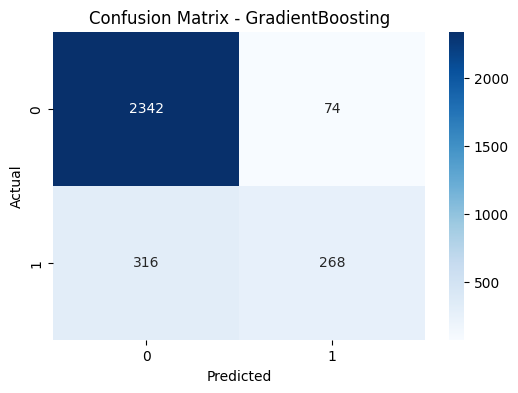

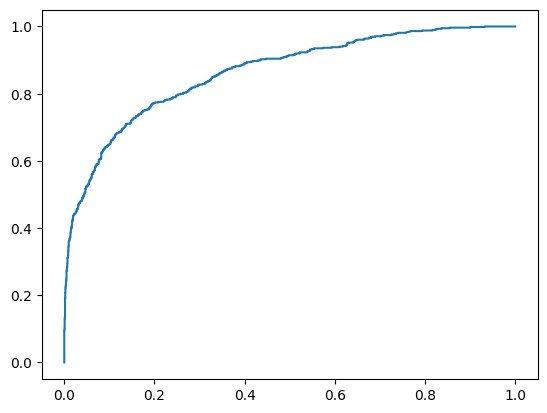

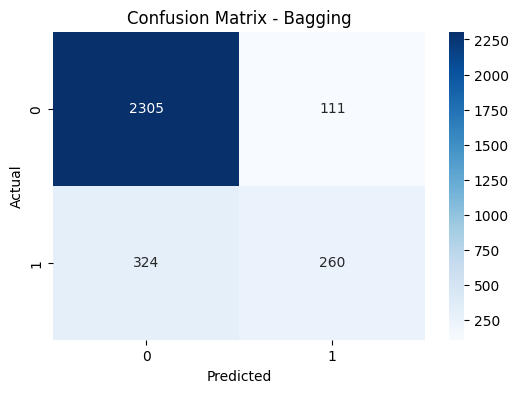

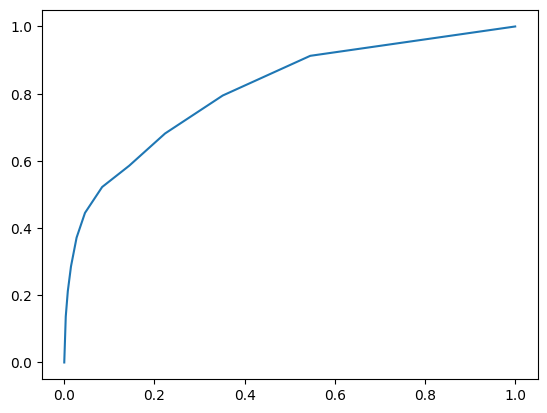

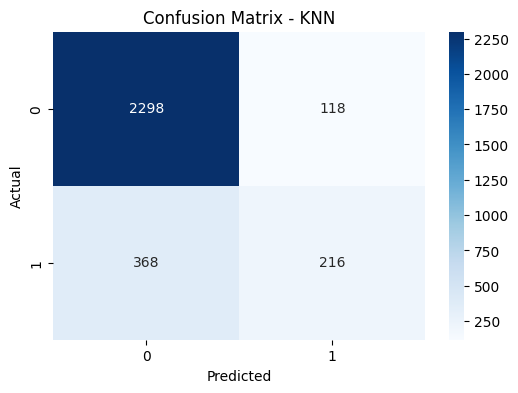

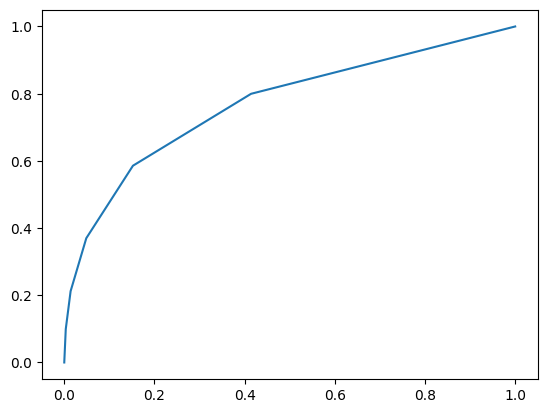

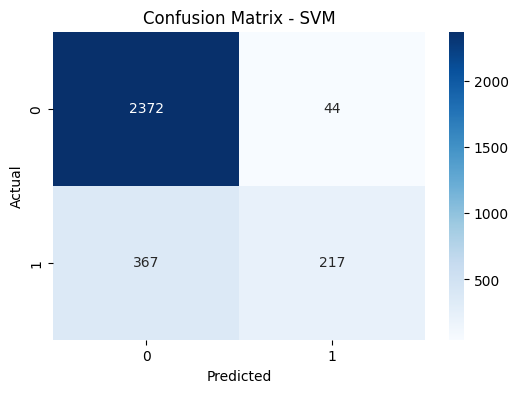

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:13:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


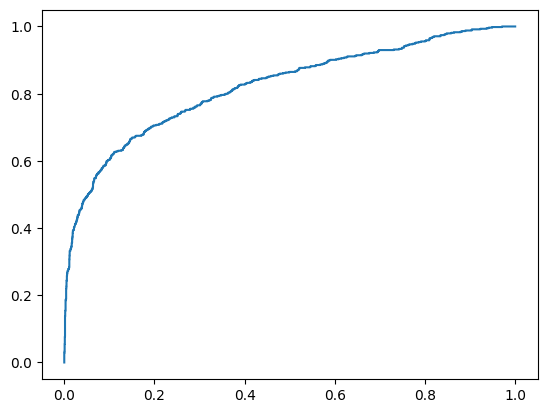

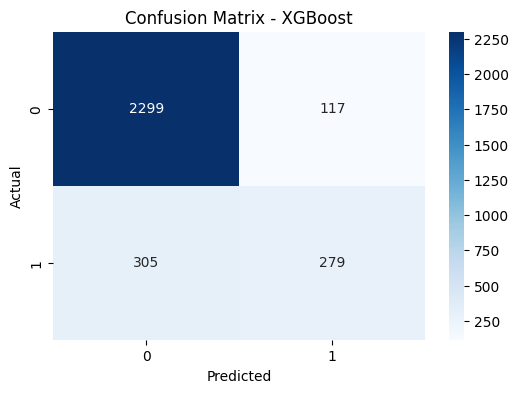

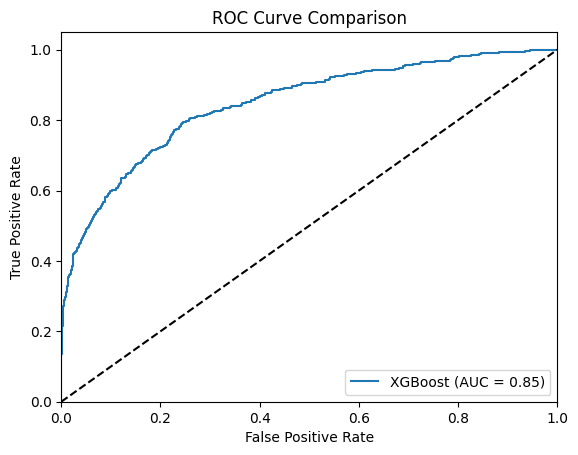

                  Accuracy  Precision    Recall  F1 Score
RandomForest      0.866000   0.764535  0.450342  0.566810
AdaBoost          0.860000   0.711340  0.472603  0.567901
GradientBoosting  0.870000   0.783626  0.458904  0.578834
Bagging           0.855000   0.700809  0.445205  0.544503
KNN               0.838000   0.646707  0.369863  0.470588
SVM               0.863000   0.831418  0.371575  0.513609
XGBoost           0.859333   0.704545  0.477740  0.569388


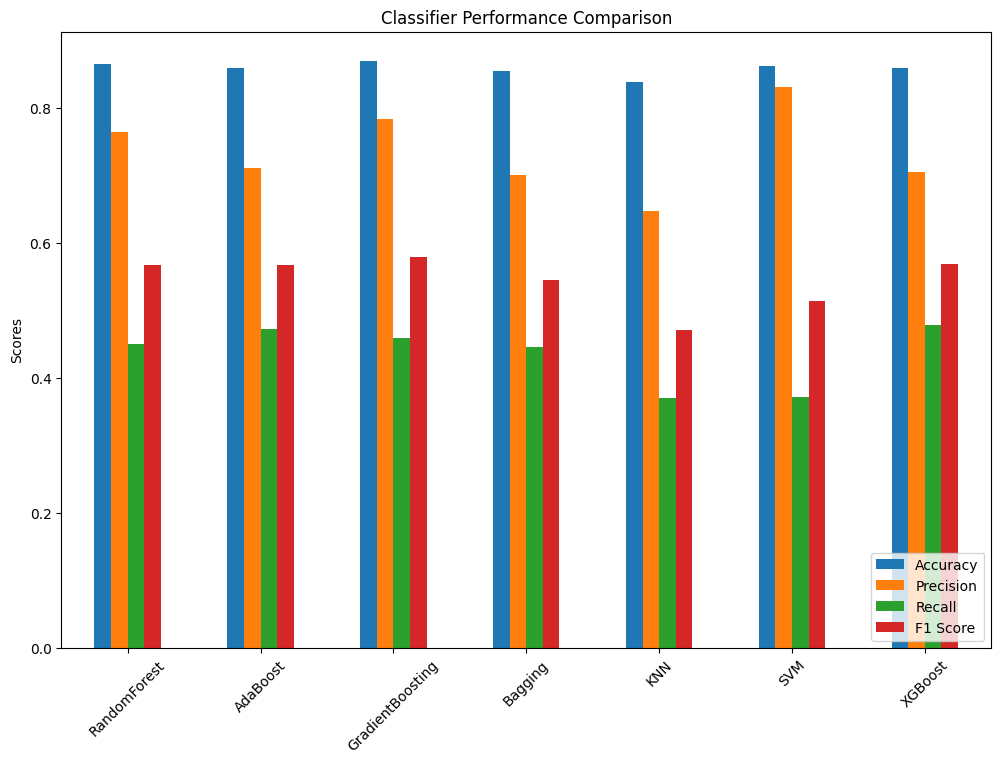

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset using google.colab's file upload feature
from google.colab import files
uploaded = files.upload()

# Load the dataset dynamically by accessing the first key in the uploaded dictionary
import io
file_name = next(iter(uploaded))  # Get the uploaded file name dynamically
data = pd.read_csv(io.BytesIO(uploaded[file_name]))  # Load the dataset into a pandas DataFrame

# Check the first few rows of the data to ensure it's loaded correctly
print(data.head())

# Encode categorical variables
label_encoder = LabelEncoder()

# Encode the 'country' and 'gender' columns
data['country'] = label_encoder.fit_transform(data['country'])
data['gender'] = label_encoder.fit_transform(data['gender'])

# Split the data into features and target
X = data.drop(columns=['customer_id', 'churn'])
y = data['churn']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize classifiers
classifiers = {
    "RandomForest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "Bagging": BaggingClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Dictionary to store the performance metrics
metrics = {}

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, name):
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Train and evaluate each classifier
plt.figure(figsize=(10, 8))

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]  # For ROC curve

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, name)

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    # Store metrics for comparison
    metrics[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Finalize ROC curve plot
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

# Convert metrics dictionary to a DataFrame for better readability
metrics_df = pd.DataFrame(metrics).T

# Display the performance comparison of classifiers
print(metrics_df)

# Plotting the bar graph for comparison of performance metrics
metrics_df.plot(kind='bar', figsize=(12, 8))
plt.title('Classifier Performance Comparison')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.show()
